In [1]:
get_data_dir <- function(){
    cwd <- getwd()
    repo_root_dir <- gsub('(ESDA-Spatial).*', '\\1', cwd)
    data_dir <- paste(repo_root_dir, 'data', sep='/')
    
    using_binder <- grepl('/home/jovyan', data_dir, fixed=TRUE)
    
    if (using_binder) {
        data_dir <- '/home/jovyan/data'
    }

    return(data_dir)    
}

data_dir <- get_data_dir()

data_dir

[1] "/home/jovyan/data"

In [2]:
retrieve_zip <- function(url, dir){
    temp_shapefile <- tempfile()
    download.file(url, temp_shapefile)
    unzip(temp_shapefile, exdir=dir)
}

zambia_url <- 'https://esda-spatial.s3.eu-west-2.amazonaws.com/zambia.zip'
zambia_dir <- paste(data_dir, 'zambia', sep='/')

retrieve_zip(zambia_url, zambia_dir)

In [3]:
get_path_to_obj <- function(data_dir){
    path_to_obj <- vector(mode='list', length=2)
    
    names(path_to_obj) <- c(
        paste(data_dir, 'zambia', sep='/'),
        paste(data_dir, 'africa', sep='/')
    )

    path_to_obj[[1]] <- 'https://esda-spatial.s3.eu-west-2.amazonaws.com/zambia.zip'
    path_to_obj[[2]] <- 'https://esda-spatial.s3.eu-west-2.amazonaws.com/africa.zip'
    
    return(path_to_obj)
}

download_data <- function(data_dir){
    data_dir <- get_data_dir()
    path_to_obj <- get_path_to_obj(data_dir)
    filepaths <- names(path_to_obj)

    for(i in seq_along(path_to_obj)) {
        dir <- filepaths[i]
        obj <- toString(path_to_obj[i])

        if (!dir.exists(dir)) {
            retrieve_zip(obj, dir)
        }
    }
}

download_data()

Linking to GEOS 3.8.1, GDAL 3.1.2, PROJ 7.1.0



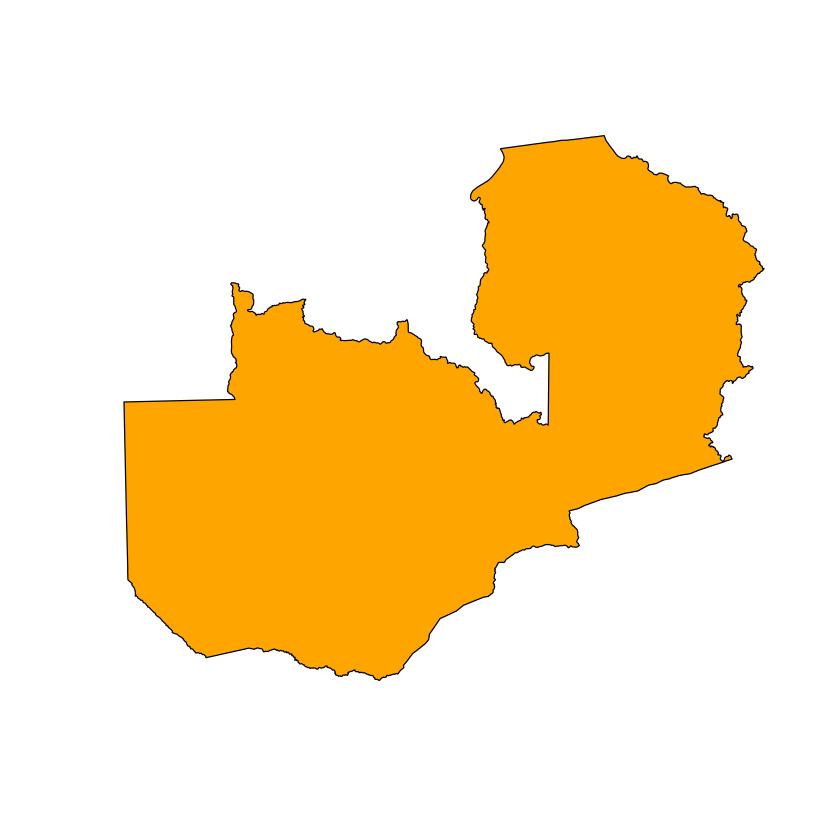

In [4]:
library(sf)

zambia_shp <- paste(zambia_dir, 'zambia.shp', sep='/')
df_country <- read_sf(zambia_shp)

plot(df_country['geometry'], col='orange')